Decision Trees and Random Forests	
    Motivating Random Forests: Decision Trees 
	Ensembles of Estimators: Random Forests
	Random Forest Regression
Principal Component Analysis	
    Introducing Principal Component Analysis
	PCA as Noise Filtering
Manifold Learning	
    Manifold Learning: “HELLO”
	Multidimensional Scaling (MDS)
	MDS as Manifold Learning
	Nonlinear Embeddings: Where MDS Fails 
	Nonlinear Manifolds: Locally Linear Embedding

In [2]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

C:\Users\bjawa\AppData\Local\Temp\ipykernel_12004\520376207.py:20: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


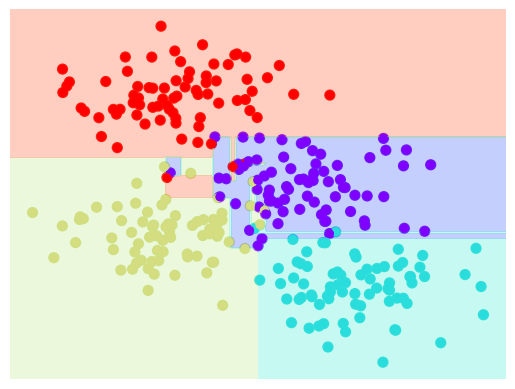

In [3]:
#decision Tree

from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)
visualize_classifier(DecisionTreeClassifier(), X, y)

C:\Users\bjawa\AppData\Local\Temp\ipykernel_12004\520376207.py:20: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


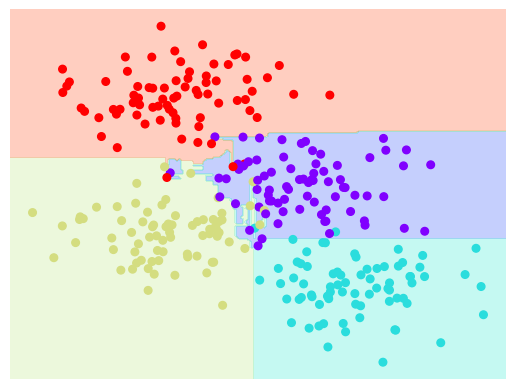

In [4]:
# bagging & boosting

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,
                        random_state=1)
bag.fit(X, y)
visualize_classifier(bag, X, y)

C:\Users\bjawa\AppData\Local\Temp\ipykernel_12004\520376207.py:20: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


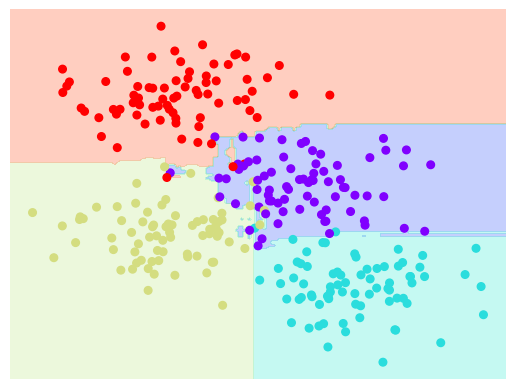

In [5]:
#Random forest  -> classification & Regression

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, X, y);

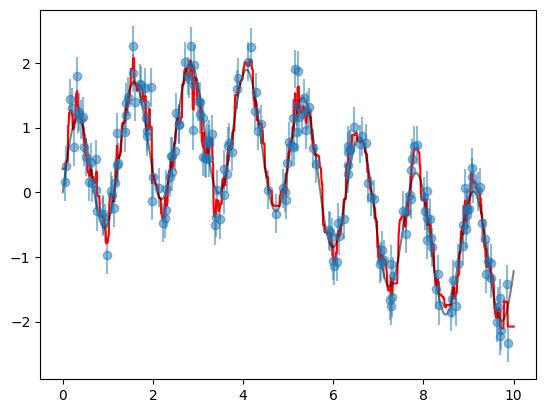

In [8]:
# random forest with regression prblm

rng = np.random.RandomState(42)
x = 10 * rng.rand(200)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))
    return slow_oscillation + fast_oscillation + noise

y = model(x)
#plt.errorbar(x, y, 0.3, fmt='o');
#refer https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html

from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(200)
forest.fit(x[:, None], y)

xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, None])
ytrue = model(xfit, sigma=0)

plt.errorbar(x, y, 0.3, fmt='o', alpha=0.5)
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);

#over-fitting

1.Over fitting -> Overfitting happens when a machine learning model fits tightly to the training data and tries to learn all the details in the data; in this case, the model cannot generalize well to the unseen data


Regularization --> Regularization is often used as a solution to the overfitting problem in Machine Learning by reducing the generalization error without affecting the training error much

Overfitting reasons:
1.Complex data
2.Insufficinet training data

Tech of Regularization:
-->strong, medium, and weak based on how effective the approach is in addressing the issue of overfitting


1.Modify loss function
    a.L2 Regularization (strong)
    b.L1 Regularization (strong)
    c.Entropy Regularization  (strong)
2.Modify sampling method
    a.Data Augmentation(weak)
    b.K-fold Cross-Validation(medium)
3. Modify training algorithm
    a.Dropout(strong)
    b. Injecting noise (weak)